In [1]:
# Install packages for project
# This has been commented as these packages have already been installed.

# %pip install pandas
# %pip install deep-translator
# %pip install google_trans_new
# %pip install google-cloud-translate==2.0.1
# %pip install trrex
# %pip install vaderSentiment


#Importing libraries

import glob
import pandas as pd
import numpy as np
from pandas import read_csv
from deep_translator import GoogleTranslator
from nltk import word_tokenize
import re
from collections import Counter
import eli5 as e5
import nltk
import csv
from nltk.corpus import stopwords
import pandas as pd
import trrex as tx
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/michaelmoor/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelmoor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# read csv file

csv = pd.read_csv ('./data/McDonalds-Yelp-Sentiment-DFE.csv', encoding="latin-1", on_bad_lines='skip', delimiter = ',')
colums = csv.columns
print(colums)

csv.head(5)

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'policies_violated',
       'policies_violated:confidence', 'city', 'policies_violated_gold',
       'review'],
      dtype='object')


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


In [3]:
# Remove special characters and stopwords

stop = stopwords.words('english')
csv["review"] = csv["review"].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop))

csv["review"] = csv["review"].map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))
csv.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,im huge mcds lover ive better ones this far wo...
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,terrible customer service i came 930pm stood f...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,first lost order actually gave someone one els...
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,i see im one giving 1 star only 25 star thats ...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,well mcdonalds know food is this review reflec...


In [4]:
# Tokenize the reviews and add them as a seperate column
csv['tokenized-review'] = csv['review'].apply(lambda x : nltk.word_tokenize(x))
csv['policies_violated'] = csv['policies_violated'].apply(lambda x : re.split('\r', str(x)))
csv['policies_violated:confidence'] = csv['policies_violated:confidence'].apply(lambda x : [float(x.strip(' []')) for x in re.split('\r', str(x))])

csv['tokenized-review'].head(5)

0    [im, huge, mcds, lover, ive, better, ones, thi...
1    [terrible, customer, service, i, came, 930pm, ...
2    [first, lost, order, actually, gave, someone, ...
3    [i, see, im, one, giving, 1, star, only, 25, s...
4    [well, mcdonalds, know, food, is, this, review...
Name: tokenized-review, dtype: object

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
csv['compound'] = [analyzer.polarity_scores(x)['compound'] for x in         
csv["review"]]
csv['neg'] = [analyzer.polarity_scores(x)['neg'] for x in         
csv["review"]]
csv['neu'] = [analyzer.polarity_scores(x)['neu'] for x in         
csv["review"]]
csv['pos'] = [analyzer.polarity_scores(x)['pos'] for x in         
csv["review"]]

csv

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,tokenized-review,compound,neg,neu,pos
0,679455653,False,finalized,3,2/21/15 0:36,"[RudeService, OrderProblem, Filthy]","[1.0, 0.6667, 0.6667]",Atlanta,NaN,im huge mcds lover ive better ones this far wo...,"[im, huge, mcds, lover, ive, better, ones, thi...",0.0790,0.253,0.488,0.259
1,679455654,False,finalized,3,2/21/15 0:27,[RudeService],[1.0],Atlanta,NaN,terrible customer service i came 930pm stood f...,"[terrible, customer, service, i, came, 930pm, ...",-0.7430,0.192,0.725,0.083
2,679455655,False,finalized,3,2/21/15 0:26,"[SlowService, OrderProblem]","[1.0, 1.0]",Atlanta,NaN,first lost order actually gave someone one els...,"[first, lost, order, actually, gave, someone, ...",-0.7351,0.132,0.815,0.053
3,679455656,False,finalized,3,2/21/15 0:27,[na],[0.6667],Atlanta,NaN,i see im one giving 1 star only 25 star thats ...,"[i, see, im, one, giving, 1, star, only, 25, s...",0.3400,0.000,0.844,0.156
4,679455657,False,finalized,3,2/21/15 0:27,[RudeService],[1.0],Atlanta,NaN,well mcdonalds know food is this review reflec...,"[well, mcdonalds, know, food, is, this, review...",0.8934,0.106,0.665,0.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,679500008,False,finalized,3,2/21/15 0:13,[OrderProblem],[0.6754],Portland,NaN,i enjoyed part i repeatedly asked i right sauc...,"[i, enjoyed, part, i, repeatedly, asked, i, ri...",0.7311,0.000,0.661,0.339
1521,679500224,False,finalized,3,2/21/15 0:27,"[SlowService, Filthy, BadFood]","[1.0, 1.0, 1.0]",Houston,NaN,worst mcdonalds ive long time dirt everywhere ...,"[worst, mcdonalds, ive, long, time, dirt, ever...",-0.7579,0.351,0.649,0.000
1522,679500608,False,finalized,3,2/21/15 0:24,[ScaryMcDs],[0.6458],New York,NaN,when i really craving mcdonalds seems closest ...,"[when, i, really, craving, mcdonalds, seems, c...",0.8885,0.000,0.747,0.253
1523,679501257,False,finalized,3,2/21/15 0:32,[ScaryMcDs],[0.6407],Chicago,NaN,two points right gate 1 thuggery knows race li...,"[two, points, right, gate, 1, thuggery, knows,...",-0.8627,0.109,0.819,0.072


In [6]:
# categorize reviews as expected negatieve or positive

csv['evaluation'] = csv[['neg','pos']].idxmax(axis=1)

print(csv['evaluation'].value_counts())
csv.head(5)

pos    768
neg    757
Name: evaluation, dtype: int64


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,tokenized-review,compound,neg,neu,pos,evaluation
0,679455653,False,finalized,3,2/21/15 0:36,"[RudeService, OrderProblem, Filthy]","[1.0, 0.6667, 0.6667]",Atlanta,NaN,im huge mcds lover ive better ones this far wo...,"[im, huge, mcds, lover, ive, better, ones, thi...",0.0790,0.253,0.488,0.259,pos
1,679455654,False,finalized,3,2/21/15 0:27,[RudeService],[1.0],Atlanta,NaN,terrible customer service i came 930pm stood f...,"[terrible, customer, service, i, came, 930pm, ...",-0.7430,0.192,0.725,0.083,neg
2,679455655,False,finalized,3,2/21/15 0:26,"[SlowService, OrderProblem]","[1.0, 1.0]",Atlanta,NaN,first lost order actually gave someone one els...,"[first, lost, order, actually, gave, someone, ...",-0.7351,0.132,0.815,0.053,neg
3,679455656,False,finalized,3,2/21/15 0:27,[na],[0.6667],Atlanta,NaN,i see im one giving 1 star only 25 star thats ...,"[i, see, im, one, giving, 1, star, only, 25, s...",0.3400,0.000,0.844,0.156,pos
4,679455657,False,finalized,3,2/21/15 0:27,[RudeService],[1.0],Atlanta,NaN,well mcdonalds know food is this review reflec...,"[well, mcdonalds, know, food, is, this, review...",0.8934,0.106,0.665,0.229,pos


In [7]:
# This data set does not contain golden reviews, hence we can drop these columns as we are not interested.

print(csv[['_golden']].value_counts())

# Dropping columns that are not usefull and create new dataframe reviews

reviews = csv.drop(columns=['_unit_id', '_golden', '_last_judgment_at', 'policies_violated_gold', '_unit_state'], axis=1)

reviews.head(5)

_golden
False      1525
dtype: int64


,_trusted_judgments,policies_violated,policies_violated:confidence,city,review,tokenized-review,compound,neg,neu,pos,evaluation
0,3,"[RudeService, OrderProblem, Filthy]","[1.0, 0.6667, 0.6667]",Atlanta,im huge mcds lover ive better ones this far wo...,"[im, huge, mcds, lover, ive, better, ones, thi...",0.0790,0.253,0.488,0.259,pos
1,3,[RudeService],[1.0],Atlanta,terrible customer service i came 930pm stood f...,"[terrible, customer, service, i, came, 930pm, ...",-0.7430,0.192,0.725,0.083,neg
2,3,"[SlowService, OrderProblem]","[1.0, 1.0]",Atlanta,first lost order actually gave someone one els...,"[first, lost, order, actually, gave, someone, ...",-0.7351,0.132,0.815,0.053,neg
3,3,[na],[0.6667],Atlanta,i see im one giving 1 star only 25 star thats ...,"[i, see, im, one, giving, 1, star, only, 25, s...",0.3400,0.000,0.844,0.156,pos
4,3,[RudeService],[1.0],Atlanta,well mcdonalds know food is this review reflec...,"[well, mcdonalds, know, food, is, this, review...",0.8934,0.106,0.665,0.229,pos


In [8]:
negative_reviews = reviews.loc[reviews['evaluation'] == 'neg']
positive_reviews = reviews.loc[reviews['evaluation'] == 'pos']

negative_reviews.head()

,_trusted_judgments,policies_violated,policies_violated:confidence,city,review,tokenized-review,compound,neg,neu,pos,evaluation
1,3,[RudeService],[1.0],Atlanta,terrible customer service i came 930pm stood f...,"[terrible, customer, service, i, came, 930pm, ...",-0.7430,0.192,0.725,0.083,neg
2,3,"[SlowService, OrderProblem]","[1.0, 1.0]",Atlanta,first lost order actually gave someone one els...,"[first, lost, order, actually, gave, someone, ...",-0.7351,0.132,0.815,0.053,neg
5,3,"[BadFood, SlowService]","[0.7111, 0.6444]",Atlanta,this one worst slowest mcdonalds franchises is...,"[this, one, worst, slowest, mcdonalds, franchi...",-0.7003,0.216,0.784,0.000,neg
6,3,"[SlowService, ScaryMcDs]","[0.6562, 0.6562]",Atlanta,im crazy mcdonalds this primarily slow my gosh...,"[im, crazy, mcdonalds, this, primarily, slow, ...",-0.8188,0.167,0.789,0.044,neg
8,3,"[SlowService, RudeService, MissingFood]","[1.0, 1.0, 0.6667]",Atlanta,never upset fast food drive thru service till ...,"[never, upset, fast, food, drive, thru, servic...",-0.7793,0.116,0.835,0.049,neg


In [9]:
# Count word frequency in negative and positive reviews

count_negative = Counter(word for sent in negative_reviews['tokenized-review'] for word in sent).most_common()
count_positive = Counter(word for sent in positive_reviews['tokenized-review'] for word in sent).most_common()

count_negative[0:10]

[('i', 2092),
 ('mcdonalds', 559),
 ('order', 459),
 ('food', 392),
 ('get', 361),
 ('the', 357),
 ('one', 356),
 ('time', 292),
 ('go', 279),
 ('drive', 275)]

/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


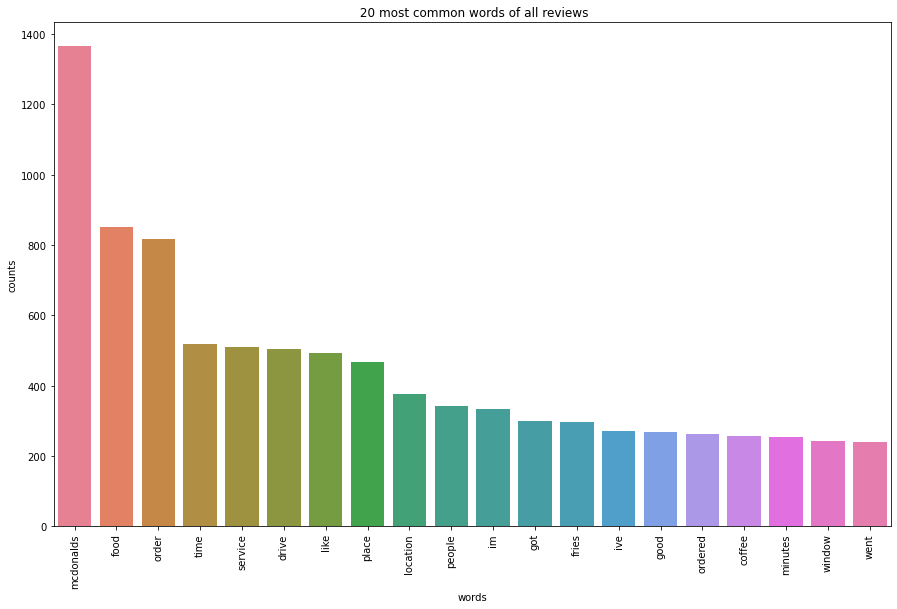

In [10]:
"""Code copyright: Vrije Universiteit Amsterdam"""

def plot_n_most_common_words(count_data, count_vectorizer, n, name):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=f' {n} most common words of {name} reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews['review'])

# Visualise the n most common words
plot_n_most_common_words(count_data, count_vectorizer, 20, 'all')

/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


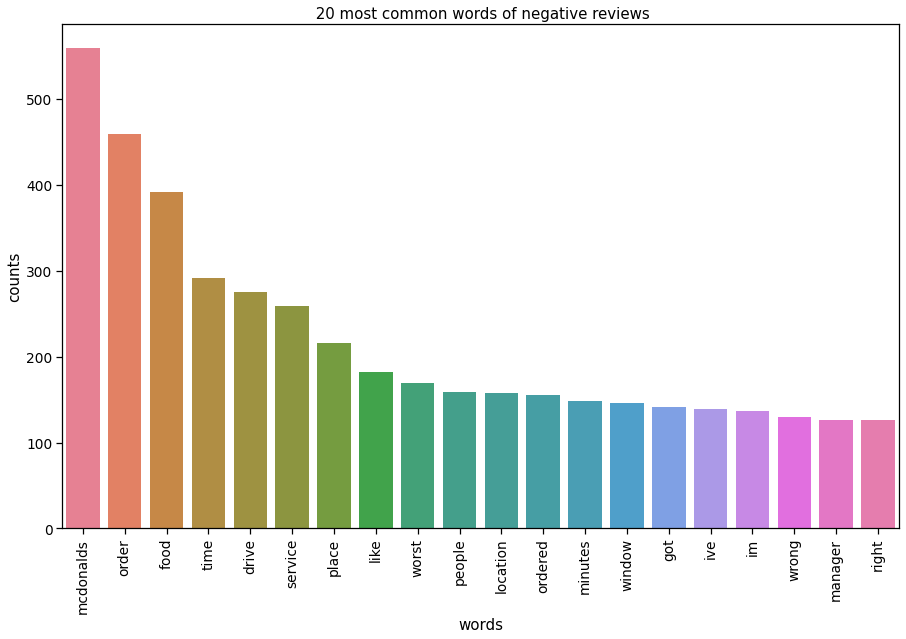

/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


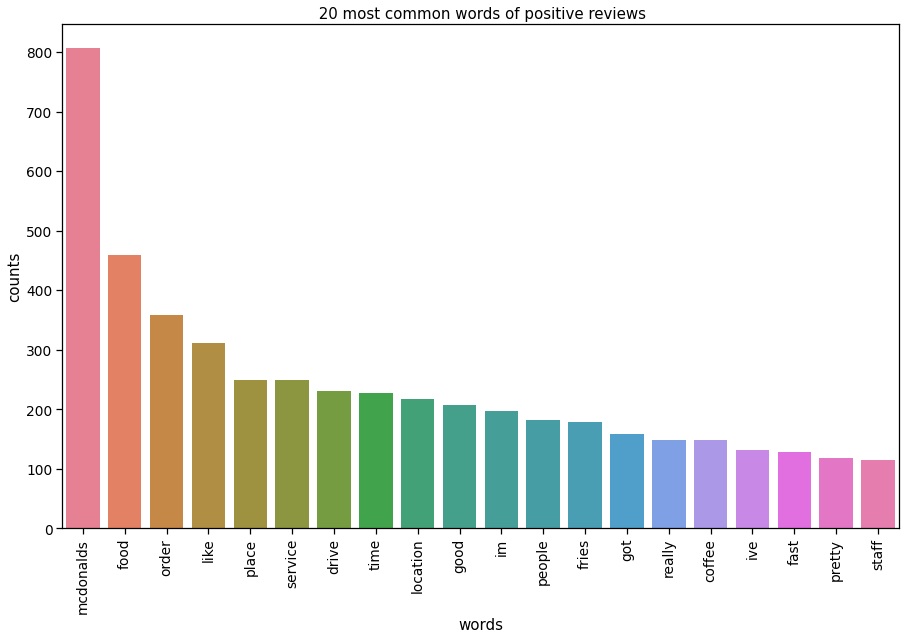

In [11]:
# Fit and transform the processed titles
count_vectorizer_negative = CountVectorizer(stop_words='english')
count_data_negative = count_vectorizer_negative.fit_transform(negative_reviews['review'])
plot_n_most_common_words(count_data_negative, count_vectorizer_negative, 20, 'negative')

count_vectorizer_positive = CountVectorizer(stop_words='english')
count_data_positive = count_vectorizer_positive.fit_transform(positive_reviews['review'])
plot_n_most_common_words(count_data_positive, count_vectorizer_positive, 20, 'positive')

In [12]:
class LDA_constructor():

    def __init__(self, data, vectorizer, n_topics = 5, num_words = 10):
        self.data = data
        self.n_topics = n_topics
        self.num_words = num_words
        self.vectorizer = vectorizer
        self.model = ' '

    def fitLDA(self):
        lda = LDA(n_components=self.n_topics)
        self.model = lda.fit(self.data)
        return self.model

    def display_topics(self):
        words = self.vectorizer.get_feature_names()
        for i, topic in enumerate(self.model.components_):
            print(f'Topic {i}#: \n {[words[i] for i in topic.argsort()[:-self.num_words - 1:-1]]}')

    def create_visual(self):
        pyLDAvis.enable_notebook()
        warnings.simplefilter("ignore", DeprecationWarning)
        warnings.simplefilter("ignore", FutureWarning)
        LDAvis_prepared = sklearn_lda.prepare(self.model, self.data, self.vectorizer)
        return LDAvis_prepared

In [13]:
# Create lda with 3 topics
lda_3_topics = LDA_constructor(count_data, count_vectorizer, 3, 10)

lda_3_topics.fitLDA()
lda_3_topics.display_topics()
lda_3_topics.create_visual()

Topic 0#: 
 ['mcdonalds', 'order', 'food', 'drive', 'time', 'service', 'like', 'location', 'place', 'got']
Topic 1#: 
 ['mcdonalds', 'food', 'place', 'service', 'order', 'im', 'time', 'like', 'people', 'fast']
Topic 2#: 
 ['mcdonalds', 'like', 'food', 'coffee', 'fries', 'place', 'really', 'good', 'want', 'im']


/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/michaelmoor/opt/anaconda3/envs/Data Wrangling/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative us

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.071908 -0.040698       1        1  59.343925
1     -0.038188  0.049952       2        1  29.912051
2      0.110096 -0.009255       3        1  10.744024, topic_info=           Term         Freq        Total Category  logprob  loglift
5299  mcdonalds  1188.000000  1188.000000  Default  30.0000  30.0000
4951       like   423.000000   423.000000  Default  29.0000  29.0000
6075      order   743.000000   743.000000  Default  28.0000  28.0000
1766     coffee   223.000000   223.000000  Default  27.0000  27.0000
6963     really   196.000000   196.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
5391       meal    12.175897   133.748867   Topic3  -6.3163  -0.1657
2808        eat    12.222619   148.118299   Topic3  -6.3125  -0.2639
5032   location    13.130888   335.678025   Topic3  -6.2408  -1.0104
8742       time    12.891967   464.000217   Topic3  -6.2592  -1.3525
7471        say    12.059112   147.923141   Topic3  -6.3259  -0.2761

[259 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
82        1  0.880815          15
82        2  0.107855          15
399       1  0.974480       acted
423       1  0.974312  additional
537       2  0.955696       alley
...     ...       ...         ...
9588      3  0.010265       worst
9592      3  0.847126      worthy
9663      1  0.947484   yesterday
9663      2  0.072883   yesterday
9664      3  0.693531  yesterdays

[401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [14]:
# Create lda with 5 topics
lda_5_topics = LDA_constructor(count_data, count_vectorizer, 5, 10)

lda_5_topics.fitLDA()
lda_5_topics.display_topics()
lda_5_topics.create_visual()

Topic 0#: 
 ['order', 'time', 'mcdonalds', 'food', 'asked', 'ordered', 'drive', 'got', 'said', 'like']
Topic 1#: 
 ['order', 'drive', 'mcdonalds', 'food', 'service', 'like', 'window', 'place', 'minutes', 'wait']
Topic 2#: 
 ['food', 'mcdonalds', 'order', 'people', 'place', 'like', 'im', 'fast', 'fries', 'drive']
Topic 3#: 
 ['mcdonalds', 'place', 'food', 'like', 'time', 'im', 'good', 'people', 'fries', 'service']
Topic 4#: 
 ['mcdonalds', 'food', 'order', 'service', 'location', 'time', 'like', 'coffee', 'drive', 'place']


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.000910 -0.039944       1        1  30.535044
1     -0.052144 -0.032610       2        1  20.245307
0     -0.066861  0.045657       3        1  17.042770
3      0.061000 -0.037677       4        1  16.792911
2      0.057095  0.064574       5        1  15.383967, topic_info=           Term         Freq        Total Category  logprob  loglift
6075      order   712.000000   712.000000  Default  30.0000  30.0000
747       asked   152.000000   152.000000  Default  29.0000  29.0000
5299  mcdonalds  1189.000000  1189.000000  Default  28.0000  28.0000
6081    ordered   228.000000   228.000000  Default  27.0000  27.0000
5559    minutes   220.000000   220.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4775       know    27.089930   180.153885   Topic5  -5.8756  -0.0228
9565       work    25.909380   160.472068   Topic5  -5.9201   0.0483
6963     really    26.566892   201.279923   Topic5  -5.8951  -0.1532
890         bad    25.155425   158.235994   Topic5  -5.9497   0.0328
5186       make    24.286511   142.324723   Topic5  -5.9848   0.1037

[426 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
14        1  0.100979          10
14        2  0.424111          10
14        3  0.262545          10
14        4  0.141370          10
14        5  0.070685          10
...     ...       ...         ...
9663      5  0.236291   yesterday
9664      2  0.864772  yesterdays
9679      1  0.118470        york
9679      2  0.118470        york
9679      5  0.710820        york

[886 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

In [15]:
""" TODO : Implement counter --> implemented
           Plot graphs for most common words --> implemented, but VU code is used.
           Apply LDA to entire data set --> implemented
           Possibly use machine learning to check if selected words are correctly labled positive or negative """



' TODO : Implement counter --> implemented\n           Plot graphs for most common words --> implemented, but VU code is used.\n           Apply LDA to entire data set --> implemented\n           Possibly use machine learning to check if selected words are correctly labled positive or negative '